<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/leson6/CopyHW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [ ]:
df

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   expenses  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [ ]:
X = df[['age', 'bmi', 'children']]
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (1070, 3) (1070,)
Test shapes: (268, 3) (268,)


# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(model.coef_)
print(model.intercept_)

[220.72663858 332.6473806  563.40009115]
-6131.421933141168


In [ ]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [ ]:
all_metrics

,train,test
MAE,9.005730e+03,9.181190e+03
MSE,1.284646e+08,1.311886e+08
RMSE,1.133422e+04,1.145376e+04
R2,1.100000e-01,1.500000e-01


# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [ ]:
equation = f'Expenses = {model.coef_[0]:.2f} * Age + {model.coef_[1]:.2f} * BMI + {model.coef_[2]:.2f} * Children + {model.intercept_:.2f}'
print(equation)

Expenses = 220.73 * Age + 332.65 * BMI + 563.40 * Children + -6131.42


# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат

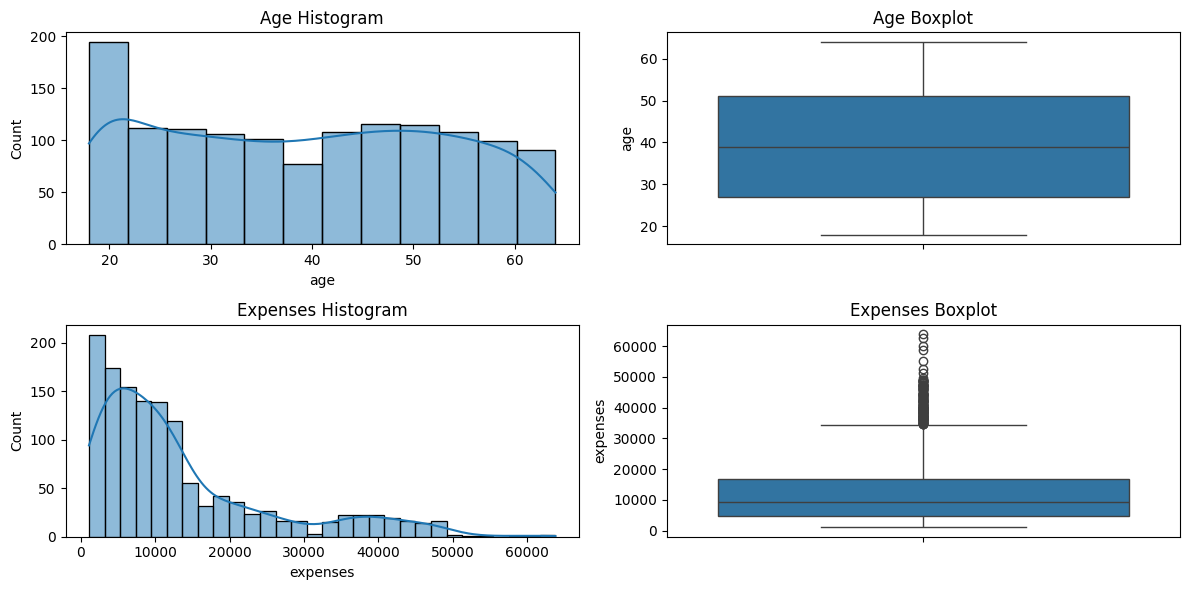

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Histogram')
plt.subplot(2, 2, 2)
sns.boxplot(df['age'])
plt.title('Age Boxplot')

plt.subplot(2, 2, 3)
sns.histplot(df['expenses'], kde=True)
plt.title('Expenses Histogram')
plt.subplot(2, 2, 4)
sns.boxplot(df['expenses'])
plt.title('Expenses Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

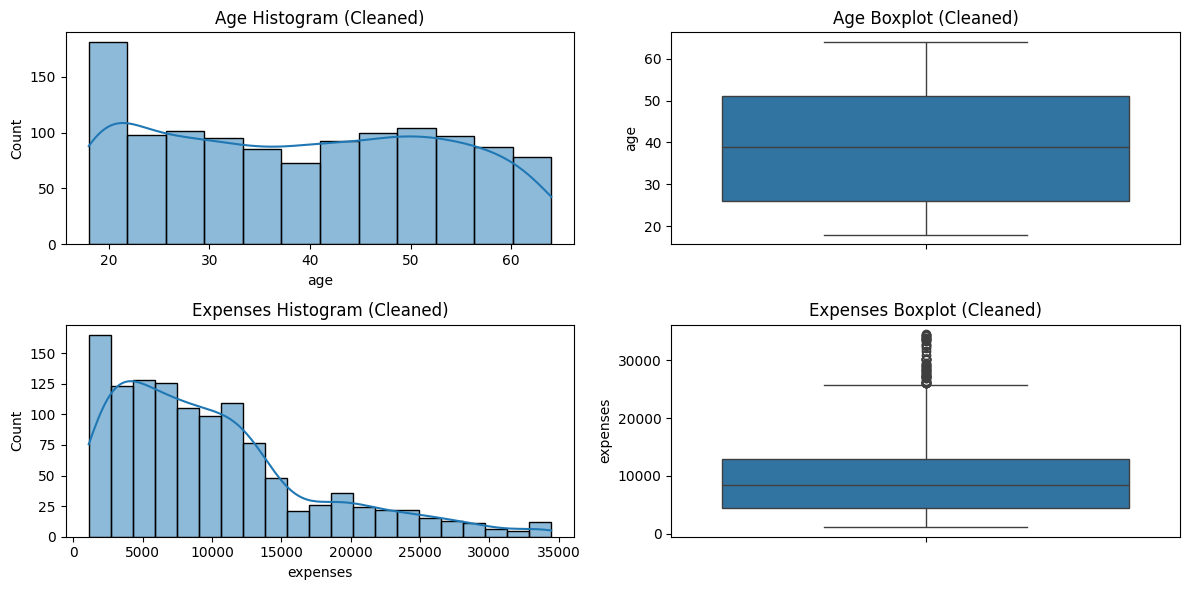

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['age'], kde=True)
plt.title('Age Histogram (Cleaned)')
plt.subplot(2, 2, 2)
sns.boxplot(df_cleaned['age'])
plt.title('Age Boxplot (Cleaned)')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['expenses'], kde=True)
plt.title('Expenses Histogram (Cleaned)')
plt.subplot(2, 2, 4)
sns.boxplot(df_cleaned['expenses'])
plt.title('Expenses Boxplot (Cleaned)')

plt.tight_layout()
plt.show()

In [ ]:
X_cleaned = df_cleaned[['age', 'bmi', 'children']]
y_cleaned = df_cleaned['expenses']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, train_size=0.8, random_state=42)

model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

In [ ]:
print("Train shapes:", X_train_cleaned.shape, y_train_cleaned.shape)
print("Test shapes:", X_test_cleaned.shape, y_test_cleaned.shape)

Train shapes: (954, 3) (954,)
Test shapes: (239, 3) (239,)


In [ ]:
def get_metrics(y_true, y_pred_cleaned, name="model_cleaned"):
  df_cleaned = pd.DataFrame()

  df_cleaned.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred_cleaned)
  df_cleaned.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred_cleaned)
  df_cleaned.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred_cleaned) ** 0.5
  df_cleaned.loc["R2", name] = metrics.r2_score(y_true, y_pred_cleaned)

  return df_cleaned.round(2)

In [ ]:
all_metrics_cleaned = pd.DataFrame()

all_metrics_cleaned["train"] = get_metrics(y_train_cleaned, model.predict(X_train_cleaned))
all_metrics_cleaned["test"] = get_metrics(y_test_cleaned, y_pred_cleaned)

In [ ]:
all_metrics_cleaned

,train,test
MAE,6997.38,4654.48
MSE,60683679.12,34597578.64
RMSE,7789.97,5881.97
R2,-0.13,0.28
